In [1]:
import os
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
import io
import base64
from read_roi import read_roi_zip

In [2]:
FOLDER=Path("C:/Users/jmc010/Data/fostrap/FT112")

In [51]:
def get_sections(folder):
    
    contents = os.listdir(folder / "lowres")
    
    sections = [f.split("_")[3].split(".")[0] for f in contents if f.endswith(".jpg")]
    return sections

def parse_roi_name(roiname):
    
    section = roiname.split("_")[0]
    region = "".join(roiname.split("_")[1:]).split("-")[0]
    
    return section, region

def get_rois(roidata):
    
    regions = []
    for roi in roidata:
        _, region = parse_roi_name(roi)
        regions.append(region)
        
    return list(set(regions))

sections = get_sections(FOLDER)

roipath = FOLDER / "lowres" / "{}_userdefined_ROIs_cleaned.zip".format(FOLDER.name)
roidata = read_roi_zip(roipath)
rois = get_rois(roidata)

In [52]:
sections

['s000',
 's001',
 's002',
 's003',
 's004',
 's005',
 's006',
 's007',
 's008',
 's009',
 's010',
 's011',
 's012',
 's013',
 's014']

In [56]:
sections_and_rois = {}
for section in sections:
    sections_and_rois[section] = {}
    for key, val in roidata.items():
        if section in key:
            sections_and_rois[section][key] = val

s004_insula_18
s004_insula_19
s004_motorctx_20
s004_motorctx_21
s010_sensoryctx_42
s010_sensoryctx_43


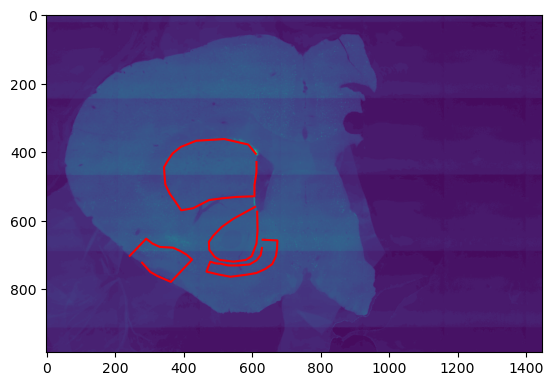

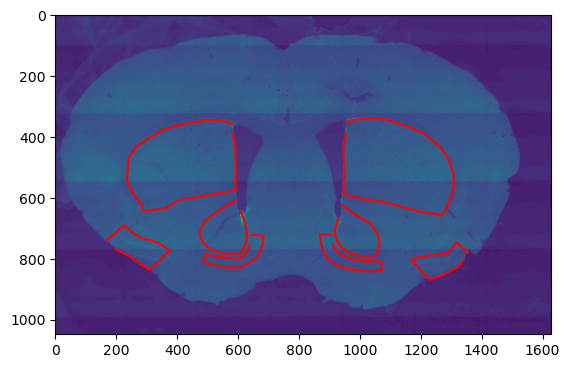

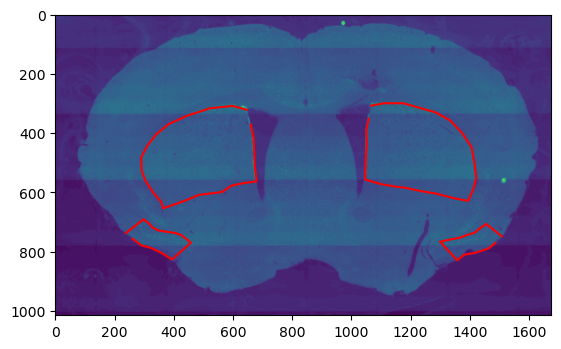

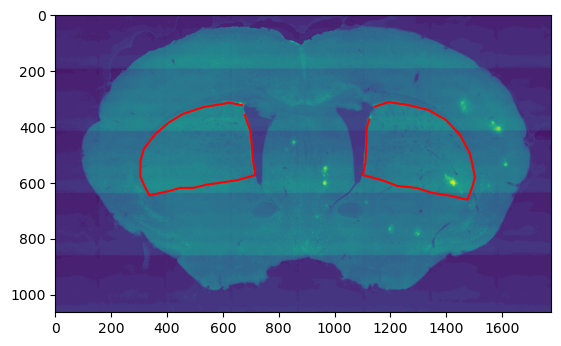

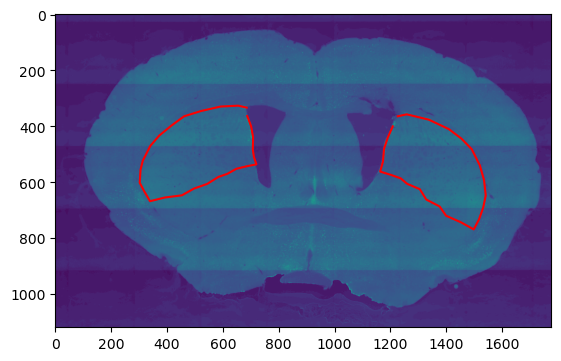

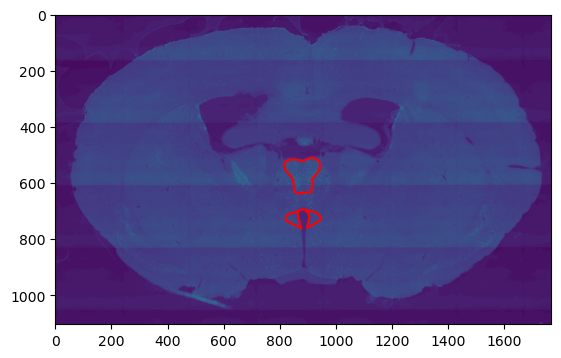

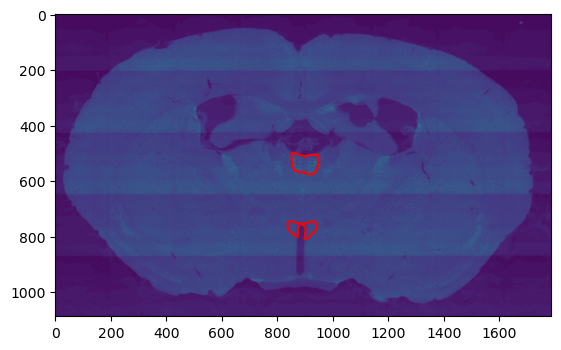

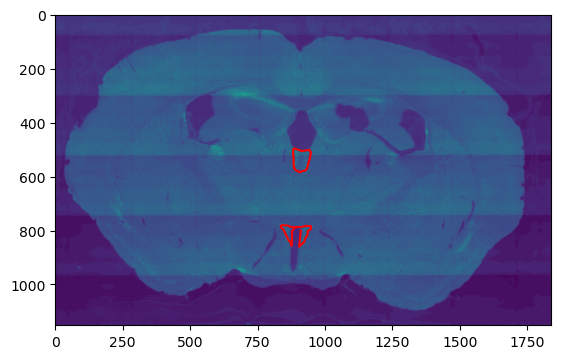

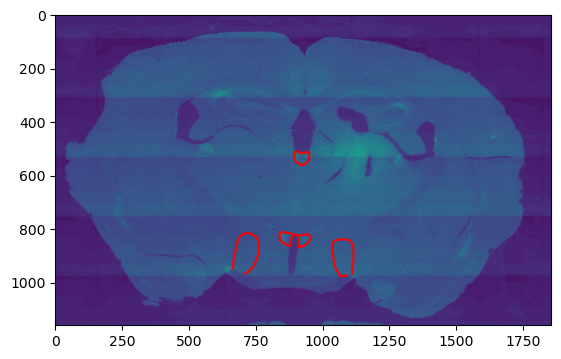

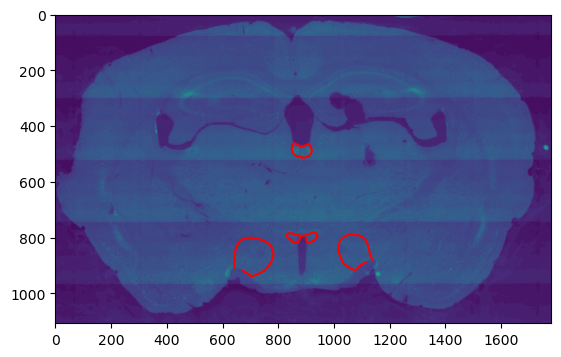

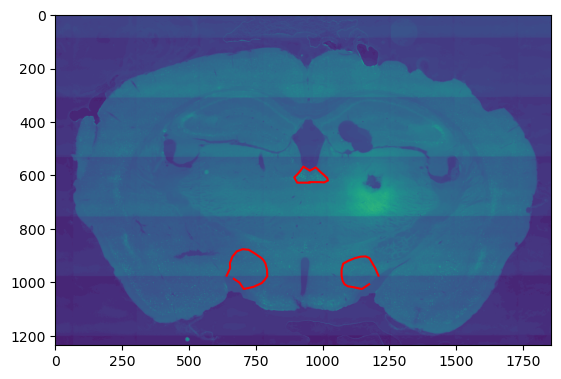

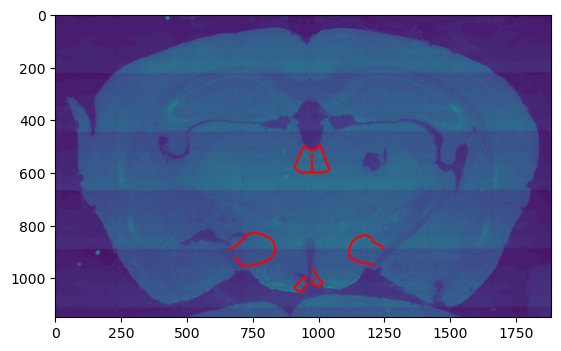

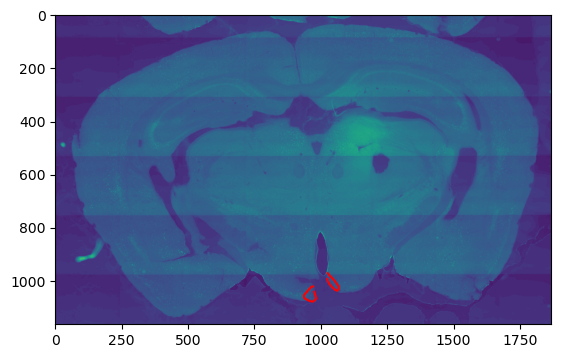

In [77]:
def get_lowres_image(folder, section):
    
    lowresimages = [f for f in os.listdir(folder / "lowres") if f.endswith("{}.jpg".format(section))]
    
    if len(lowresimages) != 1:
        print("Problem finding correct lowres image")
    else:
        im = imread(folder / "lowres" / lowresimages[0])
    
    return im

def make_figure(im, roidata):

    f, ax = plt.subplots()
    ax.imshow(im)
    for key, roi in roidata.items():
        try:
            ax.plot(roi["x"], roi["y"], color="red")
        except KeyError:
            print(key)
    
    img = io.BytesIO()
    f.savefig(img, format='png')
    
    img.seek(0)
    f_base64 = base64.b64encode(img.getvalue()).decode()
    
    return f_base64

def make_section_html(section, figure):
    
    return f"""
    <html>
      <body>
        <h1>{section}</h1>
        <img src="data:image/png;base64,{figure}" alt="Matplotlib Plot" class="blog-image">
      </body>
    </html>
    """

animal = "FT112"

html_all = f"""
<html>
  <head>
    <title>{animal}</title>
  </head>
</html>
"""

# loop through all sections
for key, val in sections_and_rois.items():
    if len(val.keys()) == 0:
        continue
        
    im = get_lowres_image(FOLDER, key)       
    f_base64 = make_figure(im, val)
    html_all = html_all + make_section_html(key, f_base64)

In [78]:
html_file = f"{animal}.html"
with open(FOLDER / html_file, "w") as f:
    f.write(html_all)